## Analyzing Housing in Sacramento

This notebook looks into using various python-based analysis and data science libraries in an attempt to build a report to analyze housing and a simple recommendation system for housing in Sacramento

### 1. Problem definitions

> Given housing attributes, what factors make a house expensive?

### 2. Data 
> The data comes from my attempt to scrape data from Trulia:
    https://www.trulia.com/CA/Sacramento/
        
> Check the github page for more information about the scraping process

## 3. Evaluation

> Given specific criteria, can we pick the top 10 houses available?

## 4. Features

This is where you'll get different information about each of the features in your data.

* price: price of the house
* address: where the house is located
* bd&ba: number of bedroom and bathroom
* sqft: how large the house is 


## Preparing the tools

We are going to use pandas, numpy, matplotlib, and seaborn for data analysis and manipulation

In [1]:
# Import the module that we are going to be using

# Regular EDA
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


# Models from scikit-learns

## Load Data

In [3]:
df = pd.read_csv('houses.csv')
df.shape

(1125, 4)

## Data Cleaning

The goal here is to make our data cleaner for later analysis and model predicting. 
1. Do we have missing data?
2. Is all of our data clean?
- Does it have correct form?
- Do we need to remove some characters to make it cleaner

In [4]:
df.head()

,price,bd&ba,sqft,address
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831"
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834"
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834"
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815"
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828"


### Do we have missing data?

In [5]:
df.isna().sum()

price       0
bd&ba      58
sqft        0
address     0
dtype: int64

It looks like we do have some missing value. It's worth checking the trulia page to find out why?

In [8]:
df[df['bd&ba'].isna()].head(10)

,price,bd&ba,sqft,address
104,"375,000",NaN,217 Silver Eagle Rd,"217 Silver Eagle Rd,, ,Sacramento, CA 95838"
141,"439,000",NaN,7001 Garden Hwy,"7001 Garden Hwy,, ,Sacramento, CA 95837"
179,"1,755,000",NaN,270 South Ave,"270 South Ave,, ,Sacramento, CA 95838"
215,"1,755,000",NaN,260 South Ave,"260 South Ave,, ,Sacramento, CA 95838"
269,"4,550,000",NaN,4101 Taylor St,"4101 Taylor St,, ,Sacramento, CA 95838"
276,"325,000",NaN,22nd St,"22nd St,, ,Rio Linda, CA 95673"
300,"1,250,000",NaN,1 (on 3.25 acres),"6140 Lemon Hill Ave,, ,Sacramento, CA 95824"
334,"100,000",NaN,1625 Los Robles Blvd,"1625 Los Robles Blvd,, ,Sacramento, CA 95838"
373,"300,000",NaN,2009 Chinatown Aly,"2009 Chinatown Aly,, ,Sacramento, CA 95814"
391,"250,000",NaN,Branch St,"Branch St,, ,Sacramento, CA 95815"


Here's what I found:
1. All the missing values is within the "bd&ba" column. 
2. These rows are lands, not houses.
Since the scope of our project is to focus on the housing, I'm going to drop these rows

In [9]:
# Let's drop the missing rows
df.dropna(inplace=True)

# Check if we have any missing values again
df.isna().sum()

price      0
bd&ba      0
sqft       0
address    0
dtype: int64

### Let's clean our data

#### 1. "bd&ba" Column

In [10]:
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', 'Studio', '2bd',
       '5bd,5ba', '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba',
       '4bd', '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', 'Studio,2ba', '18bd', '8bd', '5bd,7ba',
       '6bd,5ba', '6bd,6ba', '6bd,8ba'], dtype=object)

We need to separate this column into two different columns. Looking at all the unique values, there's some values that contain "Studio" instead of number of bedroom. 
According to Stefan from homedit:
> A studio appartment is basically a self-contained unit and houses everything in the single room space except the bathroom. With a studio appartment, you're getting some variation of a single large room with attached of kitchen, and a separath bathroom
And because of the difference in term of housing types as well as the difficulty of determining what number of bathroom should we replace for "Studio," I'm going to drop them as well. 

Luckily, there's only over 10 records of studio type housing in the dataset so it won't affect much 

In [11]:
# Drop studio rows
df = df[df['bd&ba'] != 'Studio,2ba']
df = df[df['bd&ba']!='Studio']

# Let's check the column value again
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', '2bd', '5bd,5ba',
       '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba', '4bd',
       '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', '18bd', '8bd', '5bd,7ba', '6bd,5ba', '6bd,6ba',
       '6bd,8ba'], dtype=object)

We're finished getting rid of the Studio type house. However, we still have rows with only bedroom number. We've got to deal with it as well. Now, let's split the column first

In [14]:
df[['bd','ba']] = df['bd&ba'].str.split(',',expand=True)

In [15]:
df.head()

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3bd,3ba
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4bd,3ba
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1bd,1ba
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3bd,2ba
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3bd,2ba


Because there were rows with missing "ba" value, it's clear that there will be some missing value in the 'ba' column

In [17]:
df.isna().sum()

price       0
bd&ba       0
sqft        0
address     0
bd          0
ba         85
dtype: int64

Let's group our data with bd and see what's the most appeared value of ba with each bd value

In [18]:
df[['bd','ba']].groupby(['bd']).agg(pd.Series.mode)

,ba
bd,
10bd,[]
18bd,[]
1bd,1ba
2bd,2ba
3bd,2ba
4bd,3ba
5bd,3ba
6bd,4ba
7bd,4ba


### Impute missing ba value

Now, let's create a function to impute missing value based on the table we just created

In [19]:
def impute_ba(cols):
    ba = cols[0]
    bd = cols[1]

    if pd.isna(ba):
        if bd == '1bd':
            return '1ba'
        elif (bd == '2bd') & (bd=='3bd'):
            return '2ba'
        elif (bd == '4bd') & (bd=='5bd'):
            return '3ba'
        elif (bd == '6bd') & (bd=='7bd'):
            return '4ba'
        else:
            return str(bd)+'ba'
        
    else:
        return ba

In [20]:
# Apply the function to our dataframe
df['ba'] = df[['ba','bd']].apply(impute_ba, axis=1)

Now, let's check the ba column

In [22]:
df.isna().sum()

price      0
bd&ba      0
sqft       0
address    0
bd         0
ba         0
dtype: int64

Looks good! Now, our next step is going to be remove the "bd" and "ba" character from our values. After that, we might want to convert these two columns into int type

In [25]:
# Remove 'bd' and 'ba'
df['bd'] = df['bd'].str.replace('bd','')
df['ba'] = df['ba'].str.replace('ba','')
# Convert them into int type
df['bd'] = df['bd'].astype(int)
df['ba'] = df['ba'].astype(int)

ValueError: invalid literal for int() with base 10: '2bd'

In [92]:
df['bd'] = df['bd'].str.replace('bd','')
# df['ba'] = df['ba'].str.replace('ba','')

In [93]:
df

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3ba
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3ba
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1ba
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2ba
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3,2ba
...,...,...,...,...,...,...
1120,"519,900","3bd,2ba","1,430","4900 Boyd Dr,, ,Carmichael, CA 95608",3,2ba
1121,"369,900","2bd,2ba","1,281","2637 Independence Ave,, ,West Sacramento, CA 9...",2,2ba
1122,"799,000","4bd,4ba","3,152","9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4,4ba
1123,"485,000","3bd,2ba","1,262","1909 Yarnell Way,, ,Elk Grove, CA 95758",3,2ba


In [94]:
df['bd'] = df['bd'].astype(int)

In [95]:
df.dtypes

price      object
bd&ba      object
sqft       object
address    object
bd          int32
ba         object
dtype: object

We would want to see for each type of number of bedroom, what is the most appeared within each number of bedroom

In [96]:
df[['bd','ba']].groupby(['bd']).agg(pd.Series.mode)

,ba
bd,
1,1ba
2,2ba
3,2ba
4,3ba
5,3ba
6,4ba
7,4ba
8,8ba
10,[]


Now, let's create a function to impute missing data in 'ba' column

In [97]:
def impute_ba(cols):
    ba = cols[0]
    bd = cols[1]

    if pd.isna(ba):
        if bd == 1:
            return '1ba'
        elif (bd == 2) & (bd==3):
            return '2ba'
        elif (bd == 4) & (bd==5):
            return '3ba'
        elif (bd == 6) & (bd==7):
            return '4ba'
        else:
            return str(bd)+'ba'
        
    else:
        return ba

Impute missing value

In [98]:
df['ba'] = df[['ba','bd']].apply(impute_ba, axis=1)

Let's check our data again!

In [99]:
df.isna().sum()

price      0
bd&ba      0
sqft       0
address    0
bd         0
ba         0
dtype: int64

In [100]:
df['ba'].unique()

array(['3ba', '1ba', '2ba', '5ba', '4ba', '6ba', '8ba', '7ba', '10ba',
       '9ba', '18ba'], dtype=object)

Now, let's repeat the same steps we did with 'bd' column, we first remove 'ba' and change the column to int type

In [101]:
df['ba'] = df['ba'].str.replace('ba','')
df['ba'] = df['ba'].astype(int)

In [102]:
df

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3,2
...,...,...,...,...,...,...
1120,"519,900","3bd,2ba","1,430","4900 Boyd Dr,, ,Carmichael, CA 95608",3,2
1121,"369,900","2bd,2ba","1,281","2637 Independence Ave,, ,West Sacramento, CA 9...",2,2
1122,"799,000","4bd,4ba","3,152","9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4,4
1123,"485,000","3bd,2ba","1,262","1909 Yarnell Way,, ,Elk Grove, CA 95758",3,2


#### Price Column

In [103]:
df['price'].unique()

array(['689,000', '625,000', '224,500', '340,000', '399,000', '180,000',
       '409,900', '545,000', '291,000', '890,000', '399,900', '459,000',
       '499,000', '549,900', '575,000', '59,900', '499,900', '555,000',
       '429,000', '565,000', '589,000', '1,295,000', '597,000', '599,900',
       '620,000', '455,500', '359,900', '599,000', '515,000', '779,900',
       '500,000', '720,000', '434,900+', '1,156,641+', '650,000',
       '998,888', '215,000', '699,900', '449,777', '425,000', '459,900',
       '349,000', '290,000', '455,000', '410,000', '549,000', '900,000',
       '375,000', '685,000', '795,000', '509,990+', '488,990+', '450,000',
       '349,999', '1,199,000', '673,490+', '472,990+', '459,900+',
       '775,000', '675,000', '760,000', '495,000', '659,999', '635,000',
       '495,500', '1,775,000', '550,000', '199,500', '480,000', '477,000',
       '535,000', '329,900', '628,000', '374,310+', '869,990+',
       '469,900+', '571,950+', '558,990+', '515,990+', '699,990+',
 

As we could see, we need to remove the comma and the plus sign, let's do it

## Price column cleaning

In [104]:
# Need regular expression to make it cleaner

In [105]:
df['price'] = df['price'].str.replace(r'[,+]','')

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/1879833792.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace(r'[,+]','')


Now, let's convert it to int type

In [106]:
df['price'] = df['price'].astype(int)

In [107]:
df.dtypes

price       int32
bd&ba      object
sqft       object
address    object
bd          int32
ba          int32
dtype: object

### Sqft Column

In [108]:
df['sqft'].unique()

array(['2,235', '2,299', '667', '1,084', '1,394', '840', '1,018', '2,013',
       '1,125', '3,420 (on 0.50 acres)', '1,149 (on 0.25 acres)', '1,324',
       '1,716', '1,584', '2,219', '1,184', '1,440', '1,697', '2,090',
       '1,160', '2,030', '1,000', '3,651', '2,442',
       '1,645 (on 0.25 acres)', '2,195', '1,838 (on 0.25 acres)', '1,193',
       '1,984', '2,097', '1,887', '1,388', '1,722',
       '1,144 (on 0.75 acres)', '1,471', '1,762', '2,225 (on 0.25 acres)',
       '1,229', '2,202', '1,165', '2,694', '682', '1,897 (on 1.75 acres)',
       '1,209', '1,686', '1,638', '1,001', '1,353', '1,272', '2,017',
       '2,517 (on 0.50 acres)', '1,008', '2,185', '1,025',
       '2,322 (on 0.25 acres)', '2,298', '1,417', '1,684', '970', '3,046',
       '2,689', '1,467', '1,434', '2,190', '2,845 (on 0.25 acres)',
       '2,517', '1,323', '1,940 (on 0.25 acres)', '1,456', '2,126',
       '2,011', '1,163', '3,856 (on 0.75 acres)', '924', '1,709', '1,593',
       '1,320', '1,261', '1,504', '7

Besides the number, it sometimes will have the string "(on ... acres)", we will use regex to remove this part of out column

In [109]:
df['sqft'] = df['sqft'].str.replace(r'(\s)?\(.+\)','')

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/3616303076.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sqft'] = df['sqft'].str.replace(r'(\s)?\(.+\)','')


Now, to the comma

In [110]:
df['sqft'] = df['sqft'].str.replace(',','')

Convert it into int type

In [111]:
df['sqft'].unique()

array(['2235', '2299', '667', '1084', '1394', '840', '1018', '2013',
       '1125', '3420', '1149', '1324', '1716', '1584', '2219', '1184',
       '1440', '1697', '2090', '1160', '2030', '1000', '3651', '2442',
       '1645', '2195', '1838', '1193', '1984', '2097', '1887', '1388',
       '1722', '1144', '1471', '1762', '2225', '1229', '2202', '1165',
       '2694', '682', '1897', '1209', '1686', '1638', '1001', '1353',
       '1272', '2017', '2517', '1008', '2185', '1025', '2322', '2298',
       '1417', '1684', '970', '3046', '2689', '1467', '1434', '2190',
       '2845', '1323', '1940', '1456', '2126', '2011', '1163', '3856',
       '924', '1709', '1593', '1320', '1261', '1504', '783', '1402',
       '1053', '2347', '1362', '1989', '1562', '1900', '1945', '1454',
       '1618', '1280', '1274', '1344', '1713', '1565', '1408', '1704',
       '1892', '1535', '1492', '2044', '2515', '1355', '1064', '1843',
       '1761', '2707', '1826', '1521', '2489', '1438', '1568', '956',
       '2721'

Let's remove it the lines with address instead of sqft number, we are going to drop them as well

In [112]:
pattern = '\s.+'
filter = df['sqft'].str.contains(pattern)

In [113]:
df = df[~filter]

In [114]:
df['sqft'].unique()

array(['2235', '2299', '667', '1084', '1394', '840', '1018', '2013',
       '1125', '3420', '1149', '1324', '1716', '1584', '2219', '1184',
       '1440', '1697', '2090', '1160', '2030', '1000', '3651', '2442',
       '1645', '2195', '1838', '1193', '1984', '2097', '1887', '1388',
       '1722', '1144', '1471', '1762', '2225', '1229', '2202', '1165',
       '2694', '682', '1897', '1209', '1686', '1638', '1001', '1353',
       '1272', '2017', '2517', '1008', '2185', '1025', '2322', '2298',
       '1417', '1684', '970', '3046', '2689', '1467', '1434', '2190',
       '2845', '1323', '1940', '1456', '2126', '2011', '1163', '3856',
       '924', '1709', '1593', '1320', '1261', '1504', '783', '1402',
       '1053', '2347', '1362', '1989', '1562', '1900', '1945', '1454',
       '1618', '1280', '1274', '1344', '1713', '1565', '1408', '1704',
       '1892', '1535', '1492', '2044', '2515', '1355', '1064', '1843',
       '1761', '2707', '1826', '1521', '2489', '1438', '1568', '956',
       '2721'

Now, the column is much clean, let's convert it into the int type

In [115]:
df['sqft'] = df['sqft'].astype(int)

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/919318786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sqft'] = df['sqft'].astype(int)


In [116]:
df.dtypes

price       int32
bd&ba      object
sqft        int32
address    object
bd          int32
ba          int32
dtype: object

### Address Column

In [117]:
df['address']

0             7368 Flowerwood Way,, ,Sacramento, CA 95831
1             3707 Iskenderun Ave,, ,Sacramento, CA 95834
2       4200 E Commerce Way #1113,, ,Sacramento, CA 95834
3                6 Ashley Oaks Ct,, ,Sacramento, CA 95815
4                 7970 Bastien Ct,, ,Sacramento, CA 95828
                              ...                        
1120                 4900 Boyd Dr,, ,Carmichael, CA 95608
1121    2637 Independence Ave,, ,West Sacramento, CA 9...
1122            9867 Cape Verde Dr,, ,Elk Grove, CA 95757
1123              1909 Yarnell Way,, ,Elk Grove, CA 95758
1124              410 Berkeley Ave,, ,Roseville, CA 95678
Name: address, Length: 1051, dtype: object

Let's divide it into two columns: street and zipcode 

1. City and zipcode

In [118]:
pattern = r'(?<=,, ,).*'

In [119]:
df['city_and_code'] = df['address'].str.extract('((?<=,, ,).*)')

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/1074369507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_and_code'] = df['address'].str.extract('((?<=,, ,).*)')


In [120]:
df

,price,bd&ba,sqft,address,bd,ba,city_and_code
0,689000,"3bd,3ba",2235,"7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3,"Sacramento, CA 95831"
1,625000,"4bd,3ba",2299,"3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3,"Sacramento, CA 95834"
2,224500,"1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1,"Sacramento, CA 95834"
3,340000,"3bd,2ba",1084,"6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2,"Sacramento, CA 95815"
4,399000,"3bd,2ba",1394,"7970 Bastien Ct,, ,Sacramento, CA 95828",3,2,"Sacramento, CA 95828"
...,...,...,...,...,...,...,...
1120,519900,"3bd,2ba",1430,"4900 Boyd Dr,, ,Carmichael, CA 95608",3,2,"Carmichael, CA 95608"
1121,369900,"2bd,2ba",1281,"2637 Independence Ave,, ,West Sacramento, CA 9...",2,2,"West Sacramento, CA 95691"
1122,799000,"4bd,4ba",3152,"9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4,4,"Elk Grove, CA 95757"
1123,485000,"3bd,2ba",1262,"1909 Yarnell Way,, ,Elk Grove, CA 95758",3,2,"Elk Grove, CA 95758"


In [121]:
df['address'] = df['address'].str.replace(',, ,',', ')

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/3222799922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['address'] = df['address'].str.replace(',, ,',', ')


In [122]:
df

,price,bd&ba,sqft,address,bd,ba,city_and_code
0,689000,"3bd,3ba",2235,"7368 Flowerwood Way, Sacramento, CA 95831",3,3,"Sacramento, CA 95831"
1,625000,"4bd,3ba",2299,"3707 Iskenderun Ave, Sacramento, CA 95834",4,3,"Sacramento, CA 95834"
2,224500,"1bd,1ba",667,"4200 E Commerce Way #1113, Sacramento, CA 95834",1,1,"Sacramento, CA 95834"
3,340000,"3bd,2ba",1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",3,2,"Sacramento, CA 95815"
4,399000,"3bd,2ba",1394,"7970 Bastien Ct, Sacramento, CA 95828",3,2,"Sacramento, CA 95828"
...,...,...,...,...,...,...,...
1120,519900,"3bd,2ba",1430,"4900 Boyd Dr, Carmichael, CA 95608",3,2,"Carmichael, CA 95608"
1121,369900,"2bd,2ba",1281,"2637 Independence Ave, West Sacramento, CA 95691",2,2,"West Sacramento, CA 95691"
1122,799000,"4bd,4ba",3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",4,4,"Elk Grove, CA 95757"
1123,485000,"3bd,2ba",1262,"1909 Yarnell Way, Elk Grove, CA 95758",3,2,"Elk Grove, CA 95758"


2. Let's create another two columns for city and zipcode

In [123]:
df['city'] = df['city_and_code'].str.extract('^([^,]*)')

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/2175269618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['city_and_code'].str.extract('^([^,]*)')


In [124]:
df['zip'] = df['city_and_code'].str.extract('(\d+)')

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/1968878531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zip'] = df['city_and_code'].str.extract('(\d+)')


In [125]:
df

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
0,689000,"3bd,3ba",2235,"7368 Flowerwood Way, Sacramento, CA 95831",3,3,"Sacramento, CA 95831",Sacramento,95831
1,625000,"4bd,3ba",2299,"3707 Iskenderun Ave, Sacramento, CA 95834",4,3,"Sacramento, CA 95834",Sacramento,95834
2,224500,"1bd,1ba",667,"4200 E Commerce Way #1113, Sacramento, CA 95834",1,1,"Sacramento, CA 95834",Sacramento,95834
3,340000,"3bd,2ba",1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",3,2,"Sacramento, CA 95815",Sacramento,95815
4,399000,"3bd,2ba",1394,"7970 Bastien Ct, Sacramento, CA 95828",3,2,"Sacramento, CA 95828",Sacramento,95828
...,...,...,...,...,...,...,...,...,...
1120,519900,"3bd,2ba",1430,"4900 Boyd Dr, Carmichael, CA 95608",3,2,"Carmichael, CA 95608",Carmichael,95608
1121,369900,"2bd,2ba",1281,"2637 Independence Ave, West Sacramento, CA 95691",2,2,"West Sacramento, CA 95691",West Sacramento,95691
1122,799000,"4bd,4ba",3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",4,4,"Elk Grove, CA 95757",Elk Grove,95757
1123,485000,"3bd,2ba",1262,"1909 Yarnell Way, Elk Grove, CA 95758",3,2,"Elk Grove, CA 95758",Elk Grove,95758


### Remove Outlier

I discovered there are many outliers in our dataset. Let's remove them from our df. I'm going to remove the below 5% percentile and above 95% percentile. But before we do it, let's see the threshold value for both

In [126]:
min_threshold, max_threshold = df['price'].quantile([0.05,0.95])
print(min_threshold,max_threshold)

199000.0 1341816.0


So, should we remove houses which have prices lower than 199000 and above 1341816. Generally speaking, you could almost never find any houses less then 200k in California.

In [127]:
df[df['price']<min_threshold]

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
5,180000,"2bd,1ba",840,"49 La Fresa Ct #3, Sacramento, CA 95823",2,1,"Sacramento, CA 95823",Sacramento,95823
16,59900,"2bd,2ba",1440,"4900 Arbor Dr #18, Sacramento, CA 95834",2,2,"Sacramento, CA 95834",Sacramento,95834
136,34900,"1bd,1ba",660,"7755 Whispering Palms Dr, Sacramento, CA 95823",1,1,"Sacramento, CA 95823",Sacramento,95823
137,95000,"2bd,2ba",1344,"6225 Tyee Ave, Sacramento, CA 95841",2,2,"Sacramento, CA 95841",Sacramento,95841
139,139950,"2bd,2ba",1248,"82 Amapola Ave, Sacramento, CA 95828",2,2,"Sacramento, CA 95828",Sacramento,95828
216,84900,"2bd,2ba",1056,"7548 Hazelnut Ln #94, Sacramento, CA 95828",2,2,"Sacramento, CA 95828",Sacramento,95828
217,29900,"2bd,1ba",560,"7726 Whispering Palms Dr, Sacramento, CA 95823",2,1,"Sacramento, CA 95823",Sacramento,95823
278,79900,"2bd,2ba",1440,"4206 Bouquet Way #37, Sacramento, CA 95834",2,2,"Sacramento, CA 95834",Sacramento,95834
291,135000,"2bd,2ba",1576,"206 Cooper Ave, Sacramento, CA 95823",2,2,"Sacramento, CA 95823",Sacramento,95823
292,69000,"2bd,2ba",1152,"4208 Atrium Way #52, Sacramento, CA 95834",2,2,"Sacramento, CA 95834",Sacramento,95834


After doing an investigation, most houses in the above list are mobile home. That somehow explains the low prices they might have. I'm going to remove them  

In [128]:
df = df[df['price'] > min_threshold]

In [129]:
df

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
0,689000,"3bd,3ba",2235,"7368 Flowerwood Way, Sacramento, CA 95831",3,3,"Sacramento, CA 95831",Sacramento,95831
1,625000,"4bd,3ba",2299,"3707 Iskenderun Ave, Sacramento, CA 95834",4,3,"Sacramento, CA 95834",Sacramento,95834
2,224500,"1bd,1ba",667,"4200 E Commerce Way #1113, Sacramento, CA 95834",1,1,"Sacramento, CA 95834",Sacramento,95834
3,340000,"3bd,2ba",1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",3,2,"Sacramento, CA 95815",Sacramento,95815
4,399000,"3bd,2ba",1394,"7970 Bastien Ct, Sacramento, CA 95828",3,2,"Sacramento, CA 95828",Sacramento,95828
...,...,...,...,...,...,...,...,...,...
1120,519900,"3bd,2ba",1430,"4900 Boyd Dr, Carmichael, CA 95608",3,2,"Carmichael, CA 95608",Carmichael,95608
1121,369900,"2bd,2ba",1281,"2637 Independence Ave, West Sacramento, CA 95691",2,2,"West Sacramento, CA 95691",West Sacramento,95691
1122,799000,"4bd,4ba",3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",4,4,"Elk Grove, CA 95757",Elk Grove,95757
1123,485000,"3bd,2ba",1262,"1909 Yarnell Way, Elk Grove, CA 95758",3,2,"Elk Grove, CA 95758",Elk Grove,95758


What about those with above 95 percentile?

In [130]:
df[df['price']>max_threshold]

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
76,1775000,"5bd,5ba",3856,"3521 Arden Creek Rd, Sacramento, CA 95864",5,5,"Sacramento, CA 95864",Sacramento,95864
112,1348632,"4bd,4ba",2707,"Sutter Park, Sacramento, CA 95819",4,4,"Sacramento, CA 95819",Sacramento,95819
134,2275000,1bd,1,"80 South Ave, Sacramento, CA 95838",1,1,"Sacramento, CA 95838",Sacramento,95838
204,1589000,"3bd,3ba",2450,"1301 37th St, Sacramento, CA 95816",3,3,"Sacramento, CA 95816",Sacramento,95816
281,1604990,"4bd,4ba",2716,"2366 5th Ave, Sacramento, CA 95818",4,4,"Sacramento, CA 95818",Sacramento,95818
286,2600000,"4bd,5ba",4464,"3636 Fair Oaks Blvd, Sacramento, CA 95864",4,5,"Sacramento, CA 95864",Sacramento,95864
311,1499000,"5bd,4ba",3991,"720 Cortlandt Dr, Sacramento, CA 95864",5,4,"Sacramento, CA 95864",Sacramento,95864
331,2299999,"8bd,8ba",5230,"2518 N St, Sacramento, CA 95816",8,8,"Sacramento, CA 95816",Sacramento,95816
354,1484990,"4bd,3ba",2484,"2374 5th Ave, Sacramento, CA 95818",4,3,"Sacramento, CA 95818",Sacramento,95818
366,1850000,"5bd,6ba",5039,"4001 Fair Oaks Blvd, Sacramento, CA 95864",5,6,"Sacramento, CA 95864",Sacramento,95864


We all know house could be expensive espescially in California. After a quick investigation for these houses, I think it's safe to adjust the max_threshold to 97.5%. Also, since we're going to build our models later, it's best to remove the crazy expensive ones

In [131]:
df[df['price']>df['price'].quantile(0.975)]

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
76,1775000,"5bd,5ba",3856,"3521 Arden Creek Rd, Sacramento, CA 95864",5,5,"Sacramento, CA 95864",Sacramento,95864
134,2275000,1bd,1,"80 South Ave, Sacramento, CA 95838",1,1,"Sacramento, CA 95838",Sacramento,95838
286,2600000,"4bd,5ba",4464,"3636 Fair Oaks Blvd, Sacramento, CA 95864",4,5,"Sacramento, CA 95864",Sacramento,95864
331,2299999,"8bd,8ba",5230,"2518 N St, Sacramento, CA 95816",8,8,"Sacramento, CA 95816",Sacramento,95816
366,1850000,"5bd,6ba",5039,"4001 Fair Oaks Blvd, Sacramento, CA 95864",5,6,"Sacramento, CA 95864",Sacramento,95864
497,1850000,5bd,4284,"2714 T St, Sacramento, CA 95816",5,5,"Sacramento, CA 95816",Sacramento,95816
541,2450000,10bd,6596,"Address Not Disclosed, Sacramento, CA 95820",10,10,"Sacramento, CA 95820",Sacramento,95820
572,2195000,"6bd,4ba",4353,"1117 46th St, Sacramento, CA 95819",6,4,"Sacramento, CA 95819",Sacramento,95819
774,3295000,"5bd,5ba",5527,"488 Crocker Rd, Sacramento, CA 95864",5,5,"Sacramento, CA 95864",Sacramento,95864
783,5200000,"6bd,9ba",10000,"630 Laurel Dr, Sacramento, CA 95864",6,9,"Sacramento, CA 95864",Sacramento,95864


In [132]:
df = df[df['price']<df['price'].quantile(0.975)]

In [133]:
df['price'].max()

1750000

In [134]:
df['price'].min()

199500

## Our cleaned dataset

In [135]:
df_clean = df[['price','sqft','address','city','zip','bd','ba']]

In [136]:
df_clean

,price,sqft,address,city,zip,bd,ba
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",Sacramento,95831,3,3
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",Sacramento,95834,4,3
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",Sacramento,95834,1,1
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",Sacramento,95815,3,2
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",Sacramento,95828,3,2
...,...,...,...,...,...,...,...
1120,519900,1430,"4900 Boyd Dr, Carmichael, CA 95608",Carmichael,95608,3,2
1121,369900,1281,"2637 Independence Ave, West Sacramento, CA 95691",West Sacramento,95691,2,2
1122,799000,3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",Elk Grove,95757,4,4
1123,485000,1262,"1909 Yarnell Way, Elk Grove, CA 95758",Elk Grove,95758,3,2


## Exploratory Data Analysis

#### Price distribution

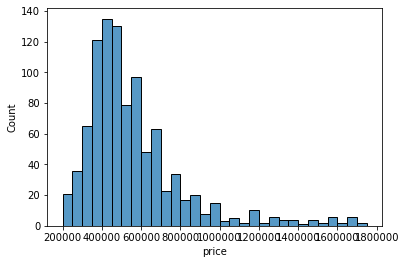

In [137]:
plt.ticklabel_format(style='plain', axis='x')
sb.histplot(data=df_clean, x='price');

#### Price/sqft

In [138]:
df_clean['price/sqft'] = df_clean['price']/df_clean['sqft']

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/3914988727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price/sqft'] = df_clean['price']/df_clean['sqft']


Now, let's look at the price/sqft distribution

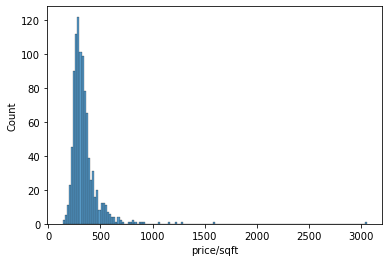

In [139]:
sb.histplot(data=df_clean, x='price/sqft');

I've noticed some outliers here too. Let's see the quartile 

In [140]:
percentile_98 = df_clean['price/sqft'].quantile(0.98)
percentile_99 = df_clean['price/sqft'].quantile(0.99)
percentile_995 = df_clean['price/sqft'].quantile(0.995)
percentile_998 = df_clean['price/sqft'].quantile(0.998)
print(percentile_98, percentile_99, percentile_995, percentile_998)

666.9965684656037 814.9083596024316 1071.9404524284741 1297.776659528891


In [141]:
quartile_range = [i/1000 for i in range(950,1000)]

In [142]:
for i in range(980,1000):
    print(i/1000,df_clean['price/sqft'].quantile(i/1000))


0.98 666.9965684656037
0.981 668.8290649538095
0.982 673.0304250185454
0.983 680.8385612980305
0.984 689.8622912560442
0.985 700.8513313517664
0.986 737.7205546418099
0.987 788.7414924178312
0.988 806.4238120506128
0.989 810.1314683632681
0.99 814.9083596024316
0.991 837.5013590039945
0.992 875.2420913884009
0.993 900.453055923962
0.994 945.98763957497
0.995 1071.9404524284741
0.996 1166.6461538461542
0.997 1221.149892933621
0.998 1297.776659528891
0.999 1629.028947368548


In [143]:
df_clean[df_clean['price/sqft']>df_clean['price/sqft'].quantile(0.992)]

,price,sqft,address,city,zip,bd,ba,price/sqft
389,1580000,1300,"Address Not Disclosed, Antelope, CA 95843",Antelope,95843,3,3,1215.384615
655,1390000,1508,"500 J St #1503, Sacramento, CA 95814",Sacramento,95814,2,3,921.750663
771,1195000,934,"500 J St #1707, Sacramento, CA 95814",Sacramento,95814,1,1,1279.443255
780,1450000,1250,"3150 I St, North Highlands, CA 95660",North Highlands,95660,3,2,1160.000000
935,1587770,1503,"500 J St #1505, Sacramento, CA 95814",Sacramento,95814,2,3,1056.400532
978,859000,960,"8095 E Stockton Blvd, Sacramento, CA 95823",Sacramento,95823,3,1,894.791667
1012,1585000,1000,"1317 H St, Sacramento, CA 95814",Sacramento,95814,2,2,1585.000000
1082,1740000,570,"9384 Florin Rd, Sacramento, CA 95829",Sacramento,95829,2,1,3052.631579


I'm going to remove these values as well

In [144]:
df_clean = df_clean[df_clean['price/sqft']<=df_clean['price/sqft'].quantile(0.992)]

In [145]:
df_clean

,price,sqft,address,city,zip,bd,ba,price/sqft
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",Sacramento,95831,3,3,308.277405
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",Sacramento,95834,4,3,271.857329
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",Sacramento,95834,1,1,336.581709
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",Sacramento,95815,3,2,313.653137
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",Sacramento,95828,3,2,286.226686
...,...,...,...,...,...,...,...,...
1120,519900,1430,"4900 Boyd Dr, Carmichael, CA 95608",Carmichael,95608,3,2,363.566434
1121,369900,1281,"2637 Independence Ave, West Sacramento, CA 95691",West Sacramento,95691,2,2,288.758782
1122,799000,3152,"9867 Cape Verde Dr, Elk Grove, CA 95757",Elk Grove,95757,4,4,253.489848
1123,485000,1262,"1909 Yarnell Way, Elk Grove, CA 95758",Elk Grove,95758,3,2,384.310618


Questions: 
1. What zipcode has the highest price?
2. How sqft, bd, ba relate to price?
3. My friend zed wants to find a house in Sacramento. What is the top 10 houses if his criteria is:
- Low price (35% weight) - Best in value (15% weight price/sqft)
- Sqft > 2000 (20% weight)
- Has at least 3 bedrooms and 2 bathrooms (15%)
- In zipcode 95841, 95816 so that he could be closer with his parents (15%)



What to do? research geopy for mapping address
https://towardsdatascience.com/geocode-with-python-161ec1e62b89

We are going to only keep sacramento city since there's little to no data for other city.

In [146]:
df_clean = df_clean[df_clean['city']=='Sacramento']

In [147]:
df_clean[df['zip']=='95811']

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/1637982581.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean[df['zip']=='95811']


,price,sqft,address,city,zip,bd,ba,price/sqft
279,969000,2678,"709 19th St, Sacramento, CA 95811",Sacramento,95811,4,4,361.837192
297,1299995,3174,"515 18th St, Sacramento, CA 95811",Sacramento,95811,7,4,409.576244
302,1250000,3284,"1300 T St, Sacramento, CA 95811",Sacramento,95811,4,4,380.633374
309,499000,1051,"444 T St, Sacramento, CA 95811",Sacramento,95811,2,2,474.785918
360,539000,1335,"2025 S St #203, Sacramento, CA 95811",Sacramento,95811,2,2,403.745318
486,524000,1126,"912 Q St, Sacramento, CA 95811",Sacramento,95811,2,2,465.364121
534,509999,955,"1806 K St #L2, Sacramento, CA 95811",Sacramento,95811,2,2,534.030366
537,1655000,2043,"1818 L St #811, Sacramento, CA 95811",Sacramento,95811,2,2,810.083211
612,765000,1564,"2010 South St, Sacramento, CA 95811",Sacramento,95811,3,3,489.130435
632,989000,1138,"1704 O St, Sacramento, CA 95811",Sacramento,95811,3,1,869.068541


In [148]:
df_clean['price'].max()

1750000

Price distribution based on zipcode

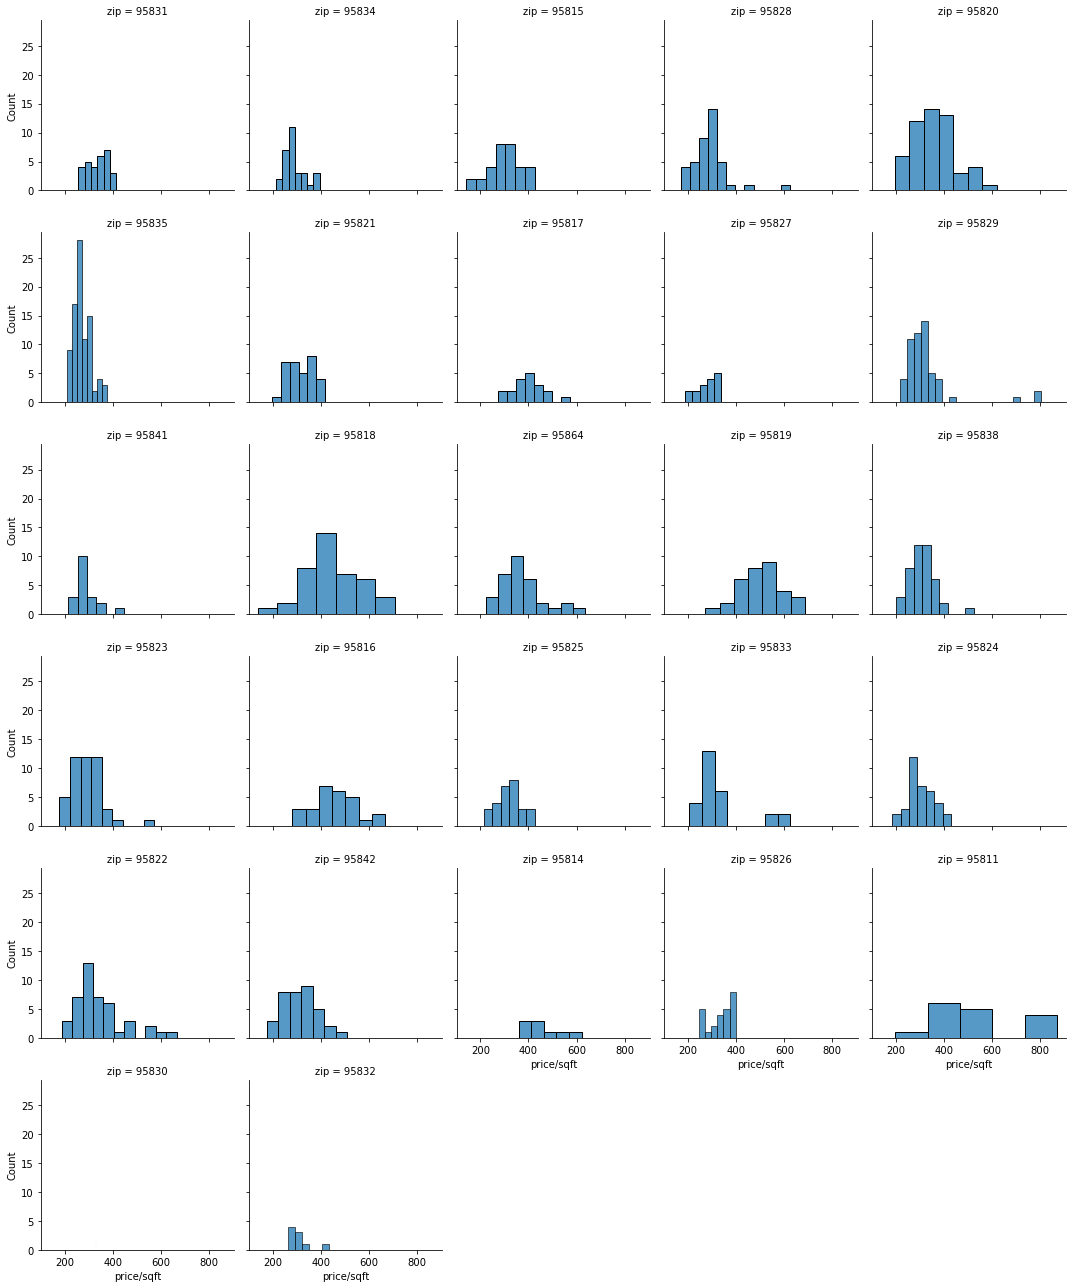

In [149]:
price_zip = sb.FacetGrid(df_clean, col='zip',height=3, col_wrap=5)
price_zip.map_dataframe(sb.histplot, x='price/sqft');

So, apparently the three expensive zipcode is 95816, 95842, 95811

### Price and sqft

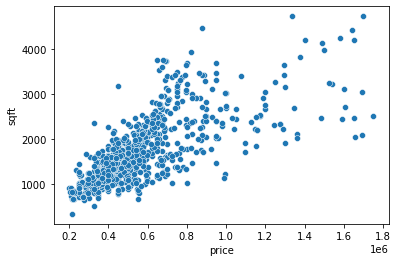

In [150]:
sb.scatterplot(data=df_clean, x='price', y='sqft');


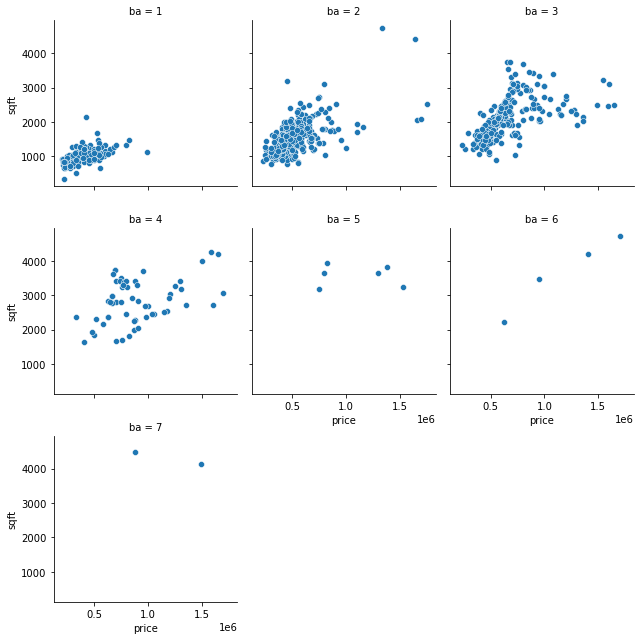

In [151]:
price_sqft = sb.FacetGrid(df_clean, col='ba',height=3, col_wrap=3)
price_sqft.map_dataframe(sb.scatterplot, x='price', y='sqft');

### Basic statistic 

In [152]:
df.describe()

,price,sqft,bd,ba
count,9.710000e+02,971.000000,971.000000,971.000000
mean,5.621241e+05,1707.372812,3.182286,2.319258
std,2.621898e+05,703.080988,0.930987,0.895021
min,1.995000e+05,344.000000,1.000000,1.000000
25%,3.996940e+05,1193.000000,3.000000,2.000000
50%,4.950000e+05,1540.000000,3.000000,2.000000
75%,6.490000e+05,2053.000000,4.000000,3.000000
max,1.750000e+06,4735.000000,7.000000,7.000000


### Let's take a look at the heatmap for correlation

In [153]:
df_clean.corr()

,price,sqft,bd,ba,price/sqft
price,1.000000,0.720196,0.380636,0.548252,0.422644
sqft,0.720196,1.000000,0.618153,0.744849,-0.259602
bd,0.380636,0.618153,1.000000,0.598972,-0.270093
ba,0.548252,0.744849,0.598972,1.000000,-0.205959
price/sqft,0.422644,-0.259602,-0.270093,-0.205959,1.000000


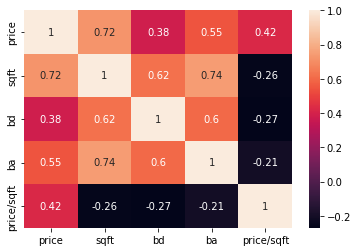

In [154]:
sb.heatmap(df_clean.corr(), annot=True);

In [155]:
df_zedd = df_clean

In [157]:
df_zedd['room_check'] = np.where((df_zedd['bd'] >= 3) & (df_zedd['ba'] >= 2),1,0) 

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/1138376571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zedd['room_check'] = np.where((df_zedd['bd'] >= 3) & (df_zedd['ba'] >= 2),1,0)


In [159]:
df_zedd['price'] = np.where((df_zedd['bd'] >= 3) & (df_zedd['ba'] >= 2),1,0) 

,price,sqft,address,city,zip,bd,ba,price/sqft,room_check
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",Sacramento,95831,3,3,308.277405,1
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",Sacramento,95834,4,3,271.857329,1
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",Sacramento,95834,1,1,336.581709,0
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",Sacramento,95815,3,2,313.653137,1
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",Sacramento,95828,3,2,286.226686,1
...,...,...,...,...,...,...,...,...,...
1081,480000,2025,"4717 36th St, Sacramento, CA 95820",Sacramento,95820,4,2,237.037037,1
1084,329000,1596,"3255 Belmont Way, Sacramento, CA 95815",Sacramento,95815,4,2,206.140351,1
1086,425000,2149,"354 Bannon St, Sacramento, CA 95811",Sacramento,95811,2,1,197.766403,0
1093,250000,919,"3255 West St, Sacramento, CA 95817",Sacramento,95817,2,2,272.034820,0


In [160]:
df_zedd['sqft_check'] = np.where(df_zedd['sqft'] >= 2000,1,0) 

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/3608172585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zedd['sqft_check'] = np.where(df_zedd['sqft'] >= 2000,1,0)


In [166]:
df_zedd['closer'] = np.where((df_zedd['zip'] == '95841') | (df_zedd['zip'] == '95816'),1,0) 

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/1020416263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zedd['closer'] = np.where((df_zedd['zip'] == '95841') | (df_zedd['zip'] == '95816'),1,0)


In [168]:
df_zedd

,price,sqft,address,city,zip,bd,ba,price/sqft,room_check,sqft_check,closer
0,689000,2235,"7368 Flowerwood Way, Sacramento, CA 95831",Sacramento,95831,3,3,308.277405,1,1,0
1,625000,2299,"3707 Iskenderun Ave, Sacramento, CA 95834",Sacramento,95834,4,3,271.857329,1,1,0
2,224500,667,"4200 E Commerce Way #1113, Sacramento, CA 95834",Sacramento,95834,1,1,336.581709,0,0,0
3,340000,1084,"6 Ashley Oaks Ct, Sacramento, CA 95815",Sacramento,95815,3,2,313.653137,1,0,0
4,399000,1394,"7970 Bastien Ct, Sacramento, CA 95828",Sacramento,95828,3,2,286.226686,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1081,480000,2025,"4717 36th St, Sacramento, CA 95820",Sacramento,95820,4,2,237.037037,1,1,0
1084,329000,1596,"3255 Belmont Way, Sacramento, CA 95815",Sacramento,95815,4,2,206.140351,1,0,0
1086,425000,2149,"354 Bannon St, Sacramento, CA 95811",Sacramento,95811,2,1,197.766403,0,1,0
1093,250000,919,"3255 West St, Sacramento, CA 95817",Sacramento,95817,2,2,272.034820,0,0,0


### Top 10 houses for Zedd

Low price (35% weight) - Best in value (15% weight price/sqft)
Sqft > 2000 (20% weight)
Has at least 3 bedrooms and 2 bathrooms (15%)
In zipcode 95841, 95816 so that he could be closer with his parents (15%)

In [171]:
df_zedd['composite_score'] = df_zedd['room_check']*0.15 + (1-df['price'].rank(pct=True))*.5 + df_zedd['sqft_check']*0.2 + df_zedd['closer']*0.15

C:\Users\Test\AppData\Local\Temp/ipykernel_3320/1531718834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zedd['composite_score'] = df_zedd['room_check']*0.15 + (1-df['price'].rank(pct=True))*.5 + df_zedd['sqft_check']*0.2 + df_zedd['closer']*0.15


In [174]:
zed_top_10_house = df_zedd.sort_values(by=['composite_score'], ascending=False).head(10)

Top 10 houses for Zed to pick in Sacramento

In [177]:
zed_top_10_house[["price","sqft","address","city","zip","bd","ba","price/sqft","composite_score"]]

,price,sqft,address,city,zip,bd,ba,price/sqft,composite_score
814,325000,2365,"2016 10th St, Sacramento, CA 95818",Sacramento,95818,4,4,137.420719,0.808805
1030,299000,1122,"5844 Peppermill Ct #4, Sacramento, CA 95841",Sacramento,95841,3,2,266.488414,0.771421
392,399900,2270,"5410 Tyler St, Sacramento, CA 95842",Sacramento,95842,4,3,176.167401,0.722297
417,389900,1347,"4757 River College Dr, Sacramento, CA 95841",Sacramento,95841,3,2,289.458055,0.692122
939,430000,2196,"4590 Perry Ave, Sacramento, CA 95820",Sacramento,95820,3,3,195.810565,0.676982
830,439500,2000,"7380 Putnam Way, Sacramento, CA 95822",Sacramento,95822,3,2,219.750000,0.666684
986,411000,1200,"5244 Fernwood Way, Sacramento, CA 95841",Sacramento,95841,3,2,342.500000,0.656849
618,229888,814,"5001 Bremner Way #1, Sacramento, CA 95841",Sacramento,95841,2,1,282.417690,0.643306
756,420000,1608,"5144 Cherokee Way, Sacramento, CA 95841",Sacramento,95841,3,2,261.194030,0.642688
199,242900,840,"5160 Connecticut Dr #3, Sacramento, CA 95841",Sacramento,95841,2,1,289.166667,0.642276
